In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

In [137]:
#reading dataset
iris=pd.read_csv("C:\\Users\\datla\\OneDrive\\Desktop\\IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [512]:
iris.shape

(150, 5)

In [291]:
#get top 5 rows 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [292]:
#check null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [293]:
#get information about dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [294]:
#count species
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [295]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#getting species==versicolor
iris[iris["species"]=="Iris-versicolor"].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [5]:
#visualization

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

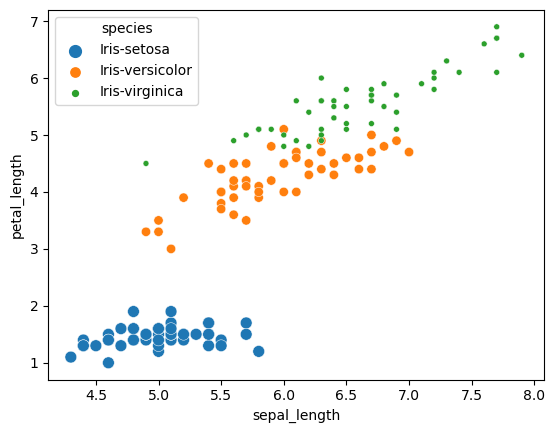

In [296]:
sns.scatterplot(x=iris["sepal_length"],y=iris["petal_length"],hue=iris["species"],size=iris["species"])

Text(0.5, 1.0, 'petal length of species')

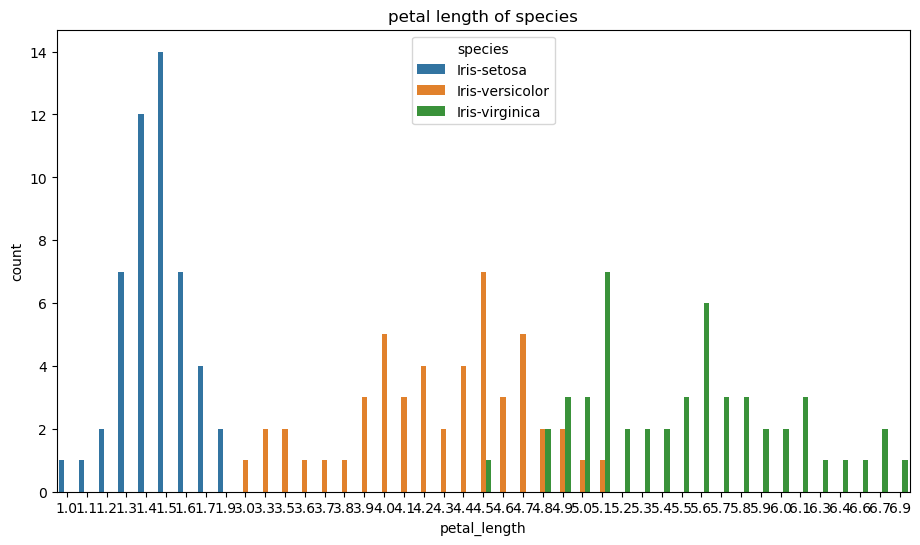

In [23]:
plt.figure(figsize=(11,6))
sns.countplot(x=iris["petal_length"],hue=iris["species"],data=iris)
plt.title("petal length of species")

<Figure size 800x600 with 0 Axes>

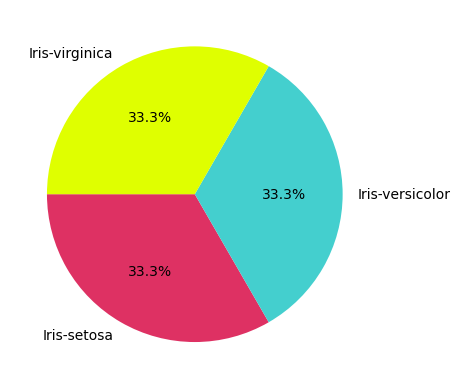

<Figure size 800x600 with 0 Axes>

In [297]:
iris_count=iris["species"].value_counts()
y=iris_count.values
labels=iris_count.index
plt.pie(y,labels=labels,colors=["#DE3163","#44cfce","#DFFF00"],autopct="%1.1f%%",startangle=180)
plt.figure(figsize=(8,6))

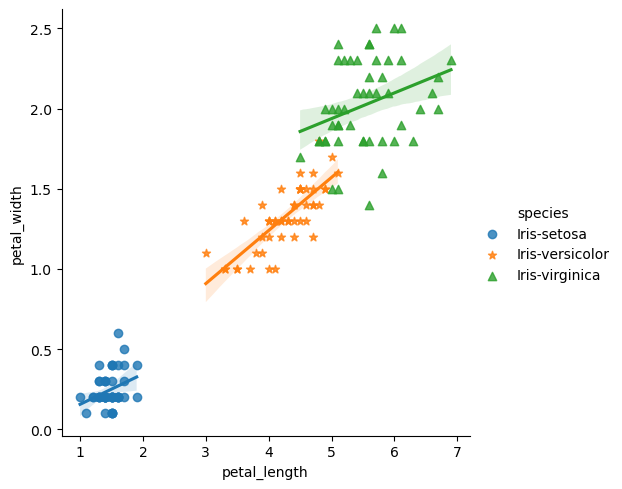

In [298]:
#lmplot
sns.lmplot(x="petal_length",y="petal_width",data=iris,hue="species",markers=["o","*","^"])

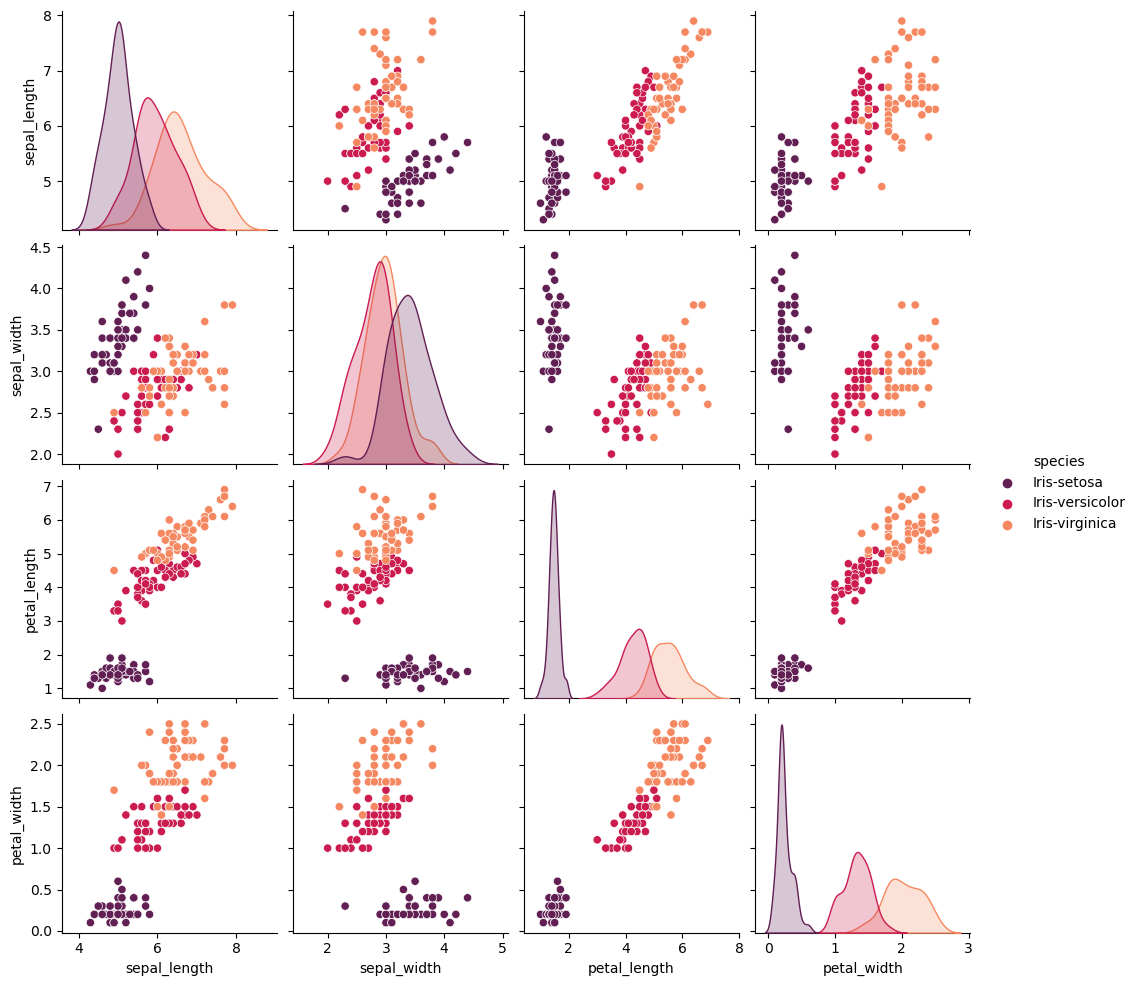

In [299]:
#pairplot
sns.pairplot(iris,hue="species",palette="rocket")

In [195]:
iris.replace(["Iris-setosa","Iris-versicolor","Iris-virginica"],[0,1,2],inplace=True)

In [196]:
#Iris-setosa=0
#Iris-versicolor=1
#Iris-virginica=2

In [197]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [198]:
#build model

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

In [200]:
x = iris.iloc[:,0:4] # Features
y = iris.iloc[:,4]  # Target (species)

In [201]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [202]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [203]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [204]:
print(x.shape,x_train.shape,x_test.shape)

(150, 4) (120, 4) (30, 4)


In [205]:
import warnings
#Suppress the warning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)



# LOGISTIC REGRESSION algorithm

In [206]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
#make prediction on test data
y_pred=model.predict(x_test)
print(y_pred)
#confusionmatrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
#accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy of logistic regression Classifier: {model1_accuracy:.2f}")

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of logistic regression Classifier: 1.00


# KNN algorithm

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

In [208]:
# Create a KNN classifier with 5 neighbors
classifier = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

# Fit the classifier to the training data
classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(x_test)
print(y_pred)
#confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
#accuracy_score
model1_accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy of KNN Classifier: {model1_accuracy:.2f}")

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of KNN Classifier: 1.00


In [209]:
#predict the species using knn algorthim
new_data=pd.DataFrame({'sepal_length':[6.8],'sepal_width':[2.6],'petal_length':[1.6],'petal_width':[0.3]})
print(classifier.predict(new_data))

[0]


In [210]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2],    # Example 1
                     [6.2, 2.8, 4.8, 1.8],    # Example 2
                     [7.3, 3.1, 6.3, 2.4]])   #Example  3
print(classifier.predict(new_data))


[0 2 2]


# DECISION TREE Algorithm

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
#Create a DECISON TREE classifier
decision_classifier=DecisionTreeClassifier()
# Fit the classifier to the training data
decision_classifier.fit(x_train,y_train)
# Make predictions on the test data
y_pred=decision_classifier.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [213]:
#creating confusion matrix
confusion_matrix(y_pred,y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [214]:
#accuracy score
model2_accuracy=accuracy_score(y_pred,y_test)
print(f"Accuracy of Decision Tree Classifier: {model2_accuracy:.2f}")

Accuracy of Decision Tree Classifier: 1.00


In [215]:
#predict new data using decision tree
new_data=pd.DataFrame({'sepal_length':[6.8],'sepal_width':[2.6],'petal_length':[1.6],'petal_width':[0.3]})
print(decision_classifier.predict(new_data))

[0]


# RANDOM FOREST Algorithm

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
#create RANDOM FOREST classifier
random_classifier=RandomForestClassifier()
# Fit the classifier to the training data
random_classifier.fit(x_train,y_train)
# Make predictions on the test data
y_pred=random_classifier.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [218]:
#create confusion matrix
pd.crosstab(y_test,y_pred,colnames=["prediction species"])

prediction species,0,1,2
species,,,
0,10,0,0
1,0,9,0
2,0,0,11


In [219]:
#accuracy
model3_accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy of random froest classifier:{model3_accuracy: .2f}")

accuracy of random froest classifier: 1.00


In [220]:
#predict new data using random forest
new_data=pd.DataFrame({'sepal_length':[5.0],'sepal_width':[3.6],'petal_length':[1.4],'petal_width':[2.0]})
print(classifier.predict(new_data))
random_classifier.predict(new_data)

[0]


array([0], dtype=int64)

In [221]:
#dataframe for accuracy score of models applied on dataset
pd.DataFrame({"model":["LogisticRegression Classifier","KNN classifier","Decision tree classifer","Random Forest classifer"],
             "accuracy":[accuracy,model1_accuracy,model2_accuracy,model3_accuracy]})

,model,accuracy
0,LogisticRegression Classifier,1.0
1,KNN classifier,1.0
2,Decision tree classifer,1.0
3,Random Forest classifer,1.0
